In [1]:
import pandas as pd
import numpy as np #used for mathematical functions.
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib
%matplotlib inline
import seaborn as sns 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split

In [2]:
Sales = pd.read_excel('produce_sales.xlsx')

In [3]:
Sales

,month,sales
0,2018-02-07,226.0
1,2018-02-08,185.9
2,2018-02-09,145.9
3,2018-02-10,315.9
4,2018-02-11,122.9
...,...,...
995,2020-10-29,287.0
996,2020-10-30,149.5
997,2020-10-31,224.5
998,2020-11-01,122.9


In [4]:
Sales.shape

(1000, 2)

In [5]:
Sales.describe()

,sales
count,1000.000000
mean,314.342900
std,148.267289
min,119.300000
25%,191.400000
50%,287.000000
75%,421.600000
max,682.000000


In [6]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   1000 non-null   datetime64[ns]
 1   sales   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


In [7]:
Sales.isna().sum()

month    0
sales    0
dtype: int64

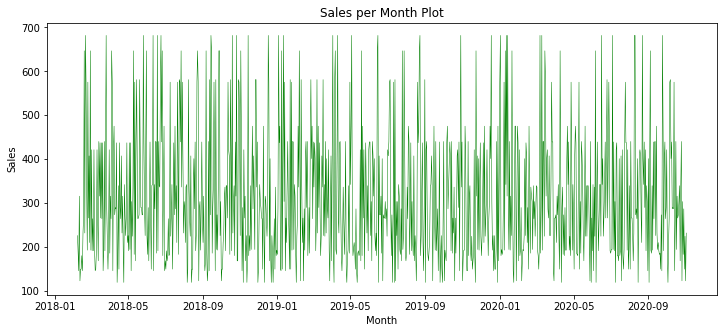

In [8]:
plt.figure(figsize=(12, 5))
plt.plot(Sales['month'], Sales["sales"], linewidth = 0.5, color='g')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.title("Sales per Month Plot");

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#X_train

In [110]:
train = Sales.sample(frac=0.75,random_state=0)
test = Sales.drop(train.index)

In [111]:
X = train.month
print(X.shape)

    
y = train.sales
print(y.shape)

(750,)
(750,)


In [112]:
train.head()

,month,sales
993,2020-10-27,303.6
859,2020-06-15,224.5
298,2018-12-02,266.0
553,2019-08-14,168.5
672,2019-12-11,421.6


In [113]:
test.head()

,month,sales
9,2018-02-16,231.8
11,2018-02-18,646.9
19,2018-02-26,407.6
23,2018-03-02,421.6
24,2018-03-03,191.4


In [114]:
def prepare_data(timeseries_data3, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data3)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data3)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data3[i:end_ix], timeseries_data3[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [115]:
test

,month,sales
9,2018-02-16,231.8
11,2018-02-18,646.9
19,2018-02-26,407.6
23,2018-03-02,421.6
24,2018-03-03,191.4
...,...,...
974,2020-10-08,401.3
976,2020-10-10,287.0
980,2020-10-14,145.9
983,2020-10-17,194.3


In [116]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   1000 non-null   datetime64[ns]
 1   sales   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 15.8 KB


In [117]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 993 to 623
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   750 non-null    datetime64[ns]
 1   sales   750 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.6 KB


In [118]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 9 to 994
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   250 non-null    datetime64[ns]
 1   sales   250 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB


In [119]:
timeseries_data3 = np.array(test['sales'])

In [120]:
n_steps = 7

In [121]:
X,y= prepare_data(timeseries_data3, n_steps)

In [122]:
print(X), print(y)

[[231.8 646.9 407.6 ... 191.4 264.5 192.8]
 [646.9 407.6 421.6 ... 264.5 192.8 421.6]
 [407.6 421.6 191.4 ... 192.8 421.6 315.9]
 ...
 [226.  475.3 191.4 ... 289.9 401.3 287. ]
 [475.3 191.4 264.5 ... 401.3 287.  145.9]
 [191.4 264.5 289.9 ... 287.  145.9 194.3]]
[421.6 315.9 437.4 145.9 191.4 682.  185.9 575.5 145.9 339.7 289.9 407.6
 266.  210.1 191.4 194.3 437.4 336.5 575.5 168.5 401.3 264.5 289.9 226.
 183.1 168.5 439.3 149.5 342.3 440.4 439.3 185.9 682.  439.3 646.9 145.9
 168.5 180.3 264.5 183.1 575.5 183.1 439.3 231.8 210.1 119.3 581.3 339.7
 264.5 287.  646.9 303.6 287.  315.9 145.9 194.3 145.9 145.9 581.3 194.3
 226.  339.7 421.6 303.6 339.7 315.9 575.5 439.3 421.6 266.  315.9 226.
 682.  339.7 475.3 287.  194.3 581.3 119.3 475.3 119.3 575.5 119.3 264.5
 149.5 180.3 183.1 646.9 581.3 119.3 342.3 266.  122.9 192.8 440.4 185.9
 581.3 439.3 336.5 289.9 289.9 289.9 266.  119.3 646.9 437.4 440.4 183.1
 119.3 192.8 339.7 342.3 682.  119.3 191.4 421.6 266.  289.9 315.9 226.
 287.  40

(None, None)

In [123]:
X.shape

(243, 7)

Reshape into three dimention, [sample, timesteps, features]

In [124]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### **Activation Process**

In [125]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
8/8 [==============================] - 2s 9ms/step - loss: 112121.0156
Epoch 2/200
8/8 [==============================] - 0s 9ms/step - loss: 67834.2344
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 30493.5625
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 25862.1660
Epoch 5/200
8/8 [==============================] - 0s 10ms/step - loss: 25463.1426
Epoch 6/200
8/8 [==============================] - 0s 8ms/step - loss: 24548.0254
Epoch 7/200
8/8 [==============================] - 0s 9ms/step - loss: 24264.3047
Epoch 8/200
8/8 [==============================] - 0s 8ms/step - loss: 23912.3984
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 24013.3242
Epoch 10/200
8/8 [==============================] - 0s 9ms/step - loss: 25554.3066
Epoch 11/200
8/8 [==============================] - 0s 8ms/step - loss: 24316.7598
Epoch 12/200
8/8 [==============================] - 0s 10ms/step - loss: 25043.8848
Epoch 13/2

In [126]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 7, 50)             10400     
                                                                 
 lstm_13 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [127]:
timeseries_data3

array([231.8, 646.9, 407.6, 421.6, 191.4, 264.5, 192.8, 421.6, 315.9,
       437.4, 145.9, 191.4, 682. , 185.9, 575.5, 145.9, 339.7, 289.9,
       407.6, 266. , 210.1, 191.4, 194.3, 437.4, 336.5, 575.5, 168.5,
       401.3, 264.5, 289.9, 226. , 183.1, 168.5, 439.3, 149.5, 342.3,
       440.4, 439.3, 185.9, 682. , 439.3, 646.9, 145.9, 168.5, 180.3,
       264.5, 183.1, 575.5, 183.1, 439.3, 231.8, 210.1, 119.3, 581.3,
       339.7, 264.5, 287. , 646.9, 303.6, 287. , 315.9, 145.9, 194.3,
       145.9, 145.9, 581.3, 194.3, 226. , 339.7, 421.6, 303.6, 339.7,
       315.9, 575.5, 439.3, 421.6, 266. , 315.9, 226. , 682. , 339.7,
       475.3, 287. , 194.3, 581.3, 119.3, 475.3, 119.3, 575.5, 119.3,
       264.5, 149.5, 180.3, 183.1, 646.9, 581.3, 119.3, 342.3, 266. ,
       122.9, 192.8, 440.4, 185.9, 581.3, 439.3, 336.5, 289.9, 289.9,
       289.9, 266. , 119.3, 646.9, 437.4, 440.4, 183.1, 119.3, 192.8,
       339.7, 342.3, 682. , 119.3, 191.4, 421.6, 266. , 289.9, 315.9,
       226. , 287. ,

### **LSTM model training**

In [128]:
# demonstrate prediction for next 300 days
x_input = np.array([191.4, 264.5, 289.9, 401.3, 287., 145.9, 194.3])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<300):
    
    if(len(temp_input)>7):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[361.16312]
1 day input [264.5        289.9        401.3        287.         145.9
 194.3        361.16311646]
1 day output [[218.92216]]
2 day input [289.9        401.3        287.         145.9        194.3
 361.16311646 218.92216492]
2 day output [[419.8711]]
3 day input [401.3        287.         145.9        194.3        361.16311646
 218.92216492 419.87109375]
3 day output [[446.47073]]
4 day input [287.         145.9        194.3        361.16311646 218.92216492
 419.87109375 446.47073364]
4 day output [[263.76224]]
5 day input [145.9        194.3        361.16311646 218.92216492 419.87109375
 446.47073364 263.76223755]
5 day output [[239.95996]]
6 day input [194.3        361.16311646 218.92216492 419.87109375 446.47073364
 263.76223755 239.95996094]
6 day output [[203.58691]]
7 day input [361.16312 218.92216 419.8711  446.47073 263.76224 239.95996 203.58691]
7 day output [[231.12415]]
8 day input [218.92216 419.8711  446.47073 263.76224 239.95996 203.58691 231.12415]
8 day outp

In [129]:
len(timeseries_data3)

250

In [130]:
lst_output

[361.16312,
 218.92216,
 419.8711,
 446.47073,
 263.76224,
 239.95996,
 203.58691,
 231.12415,
 433.08466,
 608.266,
 171.72787,
 257.06192,
 265.3089,
 328.89096,
 385.69894,
 396.43552,
 264.86636,
 240.92165,
 262.39236,
 236.4616,
 420.93774,
 476.9127,
 263.37653,
 381.31775,
 228.82036,
 269.37814,
 421.44888,
 581.0801,
 254.9368,
 370.73242,
 264.75647,
 278.16663,
 171.03769,
 404.00507,
 154.1985,
 448.30243,
 375.59708,
 359.67593,
 268.291,
 418.82025,
 328.83517,
 315.4723,
 375.33,
 267.85062,
 292.3027,
 495.45862,
 529.4664,
 268.4185,
 384.21643,
 212.68686,
 176.55241,
 352.7748,
 335.4299,
 280.30405,
 383.46155,
 477.0161,
 336.8538,
 353.69855,
 259.37415,
 262.30212,
 386.8024,
 553.02155,
 288.26566,
 354.3057,
 285.45474,
 262.842,
 306.86,
 388.9361,
 159.48073,
 385.57736,
 459.01105,
 170.19241,
 125.70481,
 250.79059,
 181.67712,
 300.9084,
 370.37268,
 263.9301,
 376.09424,
 337.39584,
 288.4744,
 398.69852,
 285.53983,
 254.15695,
 428.0491,
 288.27783,
 3

In [135]:
day_new=np.arange(1,251)
day_pred=np.arange(250,550);

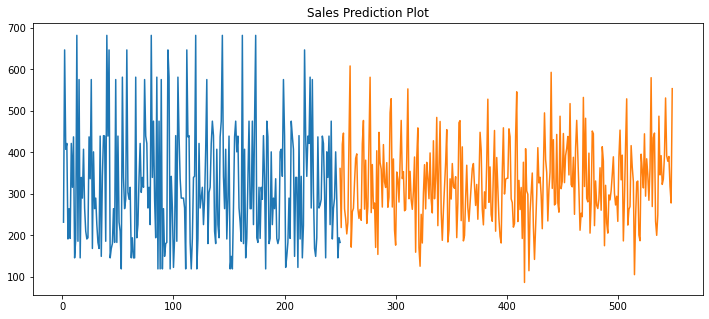

In [136]:
plt.figure(figsize=(12, 5))
plt.plot(day_new,timeseries_data3)
plt.plot(day_pred,lst_output)
plt.title("Sales Prediction Plot");
plt.show()

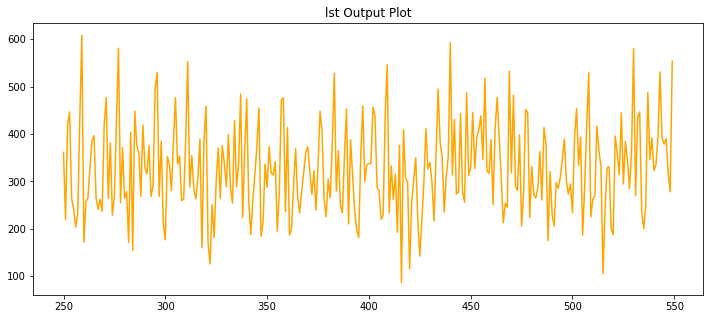

In [137]:
plt.figure(figsize=(12, 5))
plt.plot(day_pred,lst_output, color='orange')
plt.title("lst Output Plot");
plt.show()